# **Mel-Spectrograms & LSTM**

The following code uses melgrams from audio files to train an LSTM model. When applied to the test set, the model achieves an accuracy of 82.6% and an F1 (macro) score of 82.1%, with 2.0-second segmentation and a batch size of 16.

In [ ]:
# Importing the drive module from google.colab library
from google.colab import drive

# Mounting the Google Drive to the Colab environment
drive.mount('/content/drive')

project_path = '/content/drive/My Drive/GitHub/MarineMammalSoundClassification/'
%cd /content/drive/My Drive/GitHub/MarineMammalSoundClassification/

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1oJSL58N419Ve8pd0wCvgXEy52hLM2tJN/MarineMammalSoundClassification


In [ ]:
import os
import numpy as np
import pickle
from utils.utilities import ensure_dir
from utils.models_functions import load_data, create_LSTM_model, train_model, evaluate_model, save_model, load_model
from utils.display import display_model_evaluation

In [ ]:
def process_pipeline(model_name, specs_or_mels, seg_secs, epochs=40, batch_size=64, patience=5):
    """
    Performs the entire pipeline of processing, training, evaluating, and saving a neural network model.

    Args:
    model_name (str): The name to be used for saving the model and HTML output.
    specs_or_mels (str): Specifies whether to use spectrograms or mel spectrograms.
    seg_secs (int): The segment duration in seconds for which data is prepared.
    epochs (int, optional): The number of epochs to train the model. Defaults to 40.
    batch_size (int, optional): The batch size to use during training. Defaults to 64.
    patience (int, optional): The number of epochs with no improvement after which training will be stopped. Defaults to 5.

    Returns:
    None
    """
    # Load the data
    specs_path = f'spectrograms/{seg_secs}_secs/train_{specs_or_mels}.pkl'
    classes_path = f'spectrograms/{seg_secs}_secs/train_classes.pkl'

    trainX, trainY, _ = load_data(specs_path, classes_path, True)

    specs_path = f'spectrograms/{seg_secs}_secs/val_{specs_or_mels}.pkl'
    classes_path = f'spectrograms/{seg_secs}_secs/val_classes.pkl'

    valX, valY, _ = load_data(specs_path, classes_path, True)

    # Build the model
    input_shape = trainX.shape[1:]
    num_classes = len(trainY[0])
    model = create_LSTM_model((input_shape[0], input_shape[1]), num_classes)
    history = train_model(model, trainX, trainY, valX, valY, epochs, batch_size, patience)

    # Create directory for saving models if it doesn't exist
    ensure_dir('models/LSTM')

    # Save the trained model
    model_path = os.path.join('models/LSTM', model_name+'.keras')
    save_model(model, model_path)

    # Load the saved model
    loaded_model = load_model(model_path)

    # Load test data and evaluate the model
    specs_path = f'spectrograms/{seg_secs}_secs/test_{specs_or_mels}.pkl'
    classes_path = f'spectrograms/{seg_secs}_secs/test_classes.pkl'

    testSegments_path = f'spectrograms/{seg_secs}_secs/test_segments.pkl'
    with open(testSegments_path, 'rb') as f:
        testSegments = np.array(pickle.load(f))


    testX, testY, encoder = load_data(specs_path, classes_path, True)
    conf_matrix, accuracy, f1, majority_conf_matrix, majority_accuracy, majority_f1 = evaluate_model(loaded_model, testX, testY, testSegments)
    labels = list(encoder.classes_)

    display_model_evaluation('LSTM', f'input_type = {specs_or_mels} | seg_duration = {seg_secs}secs | epochs = {epochs} | batch_size = {batch_size} | patience = {patience}',\
                          history.history, accuracy, f1, conf_matrix, labels, True, majority_conf_matrix, majority_accuracy, majority_f1)

Epoch 1/80
469/469 [==============================] - 10s 14ms/step - loss: 1.6931 - accuracy: 0.5515 - val_loss: 2.8476 - val_accuracy: 0.2332 - lr: 0.0010
Epoch 2/80
469/469 [==============================] - 7s 15ms/step - loss: 1.5472 - accuracy: 0.5720 - val_loss: 2.8110 - val_accuracy: 0.2292 - lr: 0.0010
Epoch 3/80
469/469 [==============================] - 6s 12ms/step - loss: 1.3815 - accuracy: 0.5915 - val_loss: 2.7716 - val_accuracy: 0.2174 - lr: 0.0010
Epoch 4/80
469/469 [==============================] - 7s 14ms/step - loss: 1.3418 - accuracy: 0.6023 - val_loss: 2.5097 - val_accuracy: 0.2451 - lr: 0.0010
Epoch 5/80
469/469 [==============================] - 6s 12ms/step - loss: 1.2706 - accuracy: 0.6126 - val_loss: 2.6943 - val_accuracy: 0.2372 - lr: 0.0010
Epoch 6/80
469/469 [==============================] - 7s 15ms/step - loss: 1.1565 - accuracy: 0.6279 - val_loss: 2.7810 - val_accuracy: 0.2846 - lr: 0.0010
Epoch 7/80
469/469 [==============================] - 6s 13ms/s

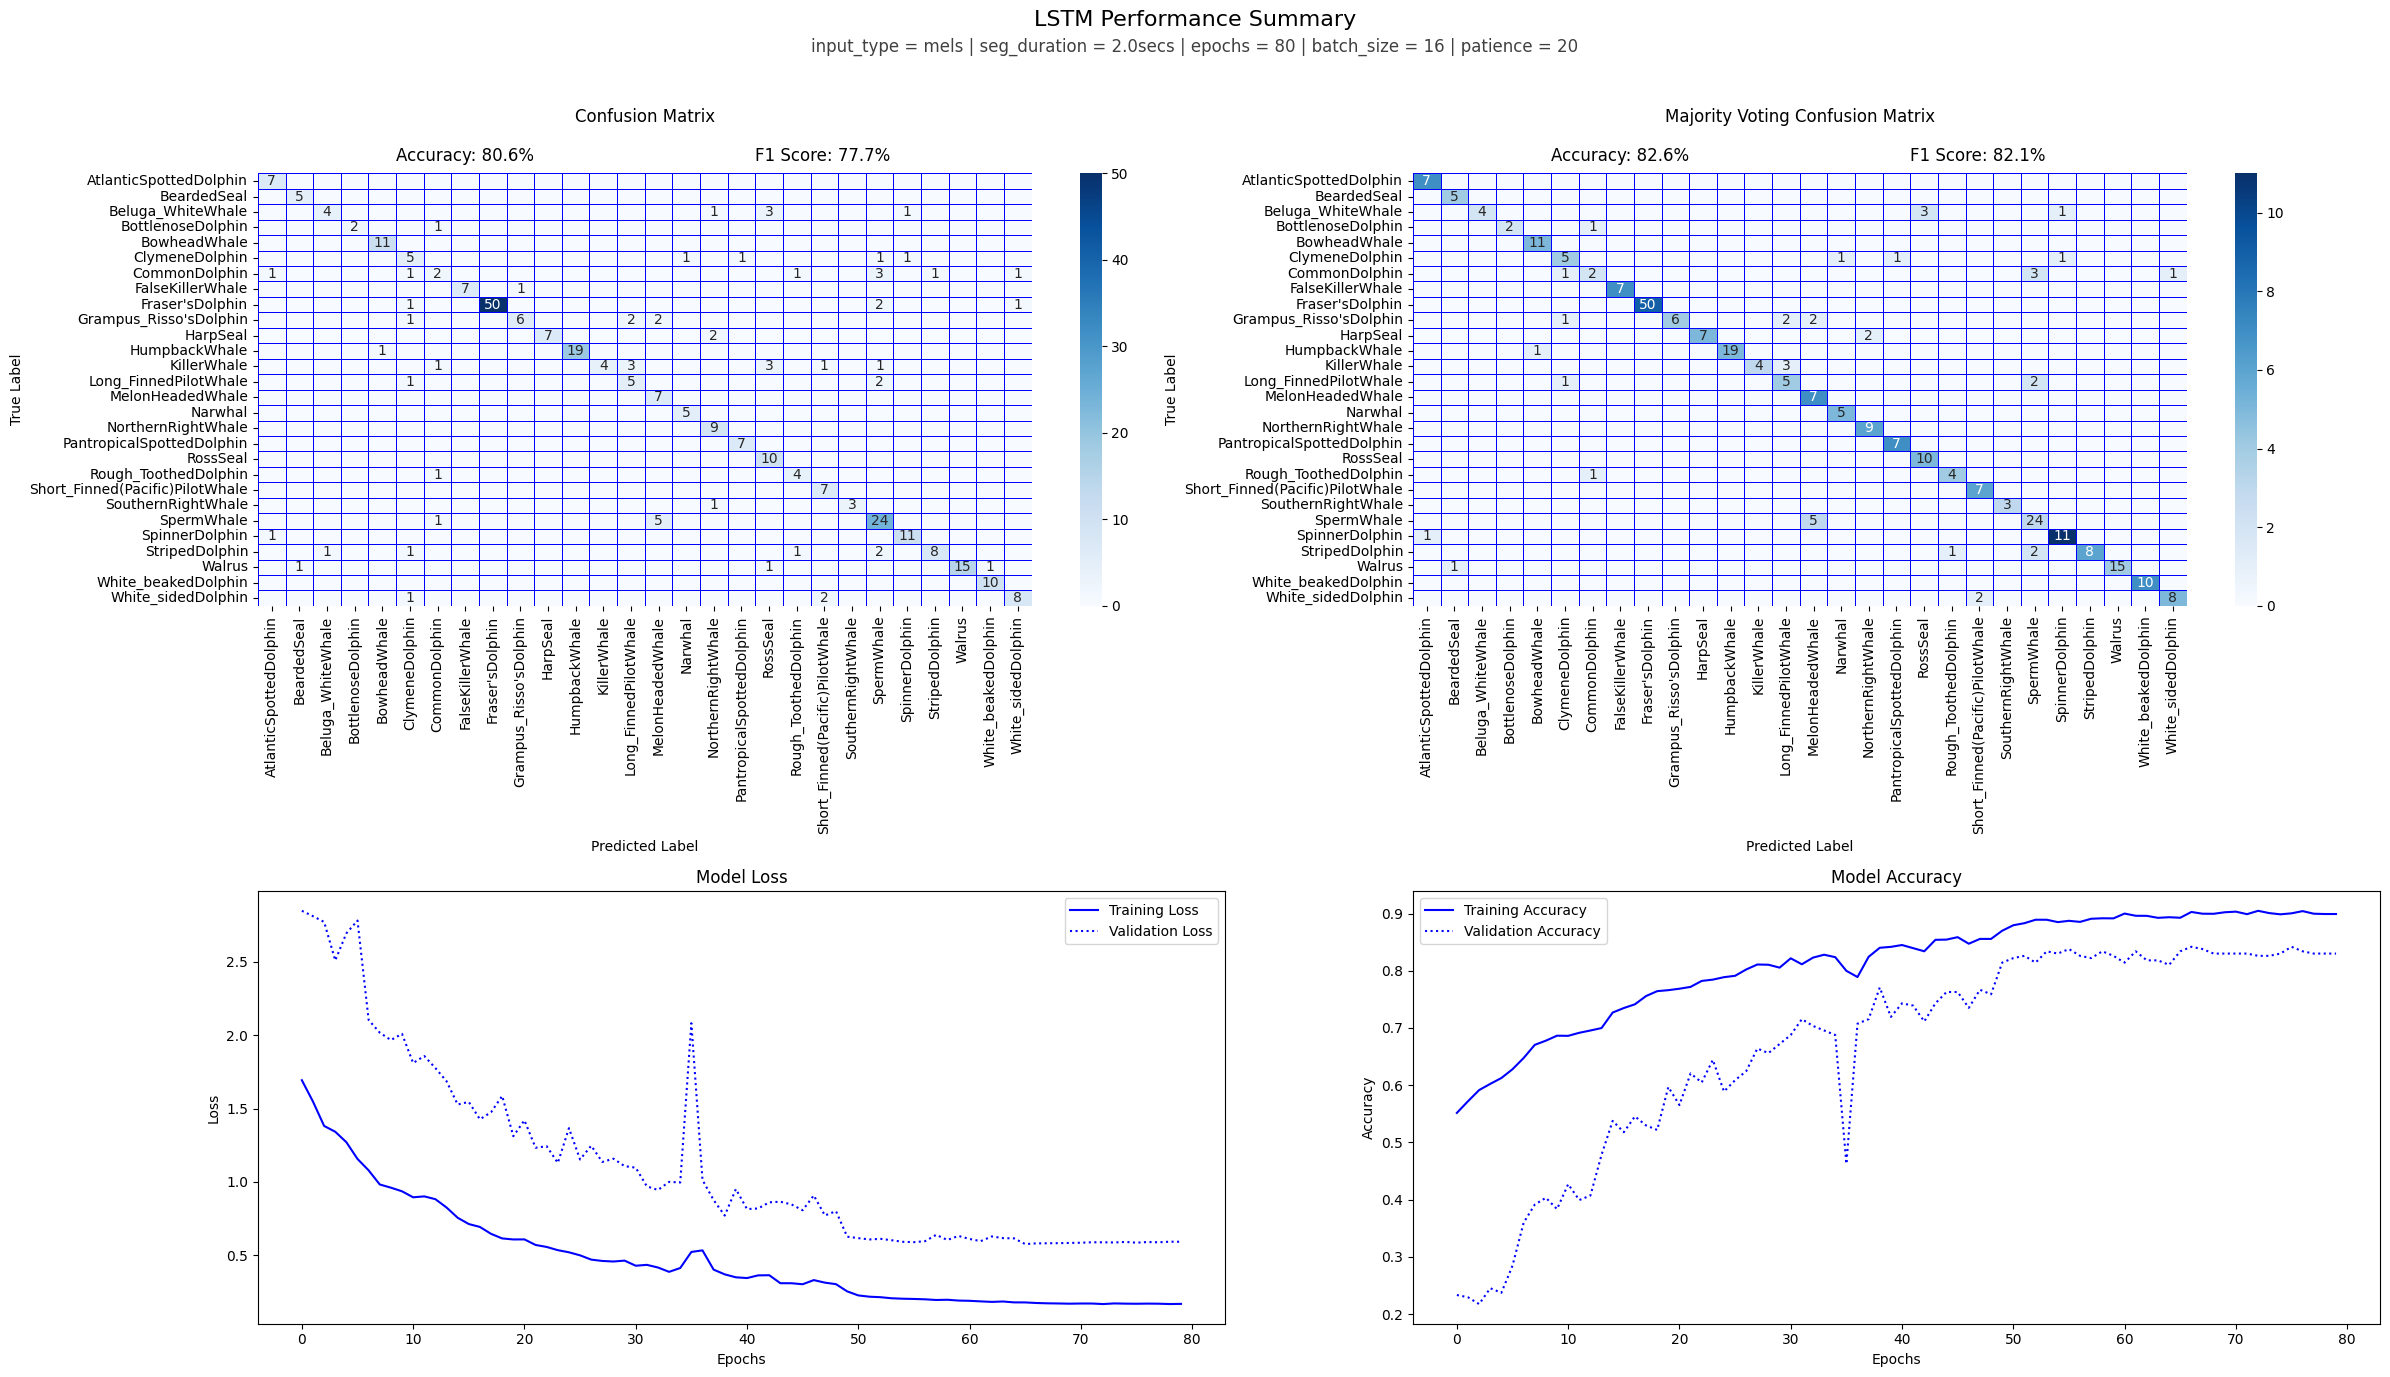

In [ ]:
process_pipeline('mels_2.0_80_16_20', 'mels', '2.0', 80, 16, 20)

Epoch 1/120
223/223 [==============================] - 7s 19ms/step - loss: 2.1096 - accuracy: 0.4448 - val_loss: 3.0563 - val_accuracy: 0.1437 - lr: 0.0010
Epoch 2/120
223/223 [==============================] - 4s 16ms/step - loss: 1.9324 - accuracy: 0.4709 - val_loss: 3.0110 - val_accuracy: 0.1796 - lr: 0.0010
Epoch 3/120
223/223 [==============================] - 3s 13ms/step - loss: 1.8445 - accuracy: 0.4874 - val_loss: 2.8527 - val_accuracy: 0.1976 - lr: 0.0010
Epoch 4/120
223/223 [==============================] - 3s 13ms/step - loss: 1.7342 - accuracy: 0.5025 - val_loss: 2.8298 - val_accuracy: 0.1677 - lr: 0.0010
Epoch 5/120
223/223 [==============================] - 3s 13ms/step - loss: 1.6835 - accuracy: 0.5050 - val_loss: 2.7063 - val_accuracy: 0.2156 - lr: 0.0010
Epoch 6/120
223/223 [==============================] - 4s 17ms/step - loss: 1.6614 - accuracy: 0.5020 - val_loss: 2.7027 - val_accuracy: 0.2455 - lr: 0.0010
Epoch 7/120
223/223 [==============================] - 3s 

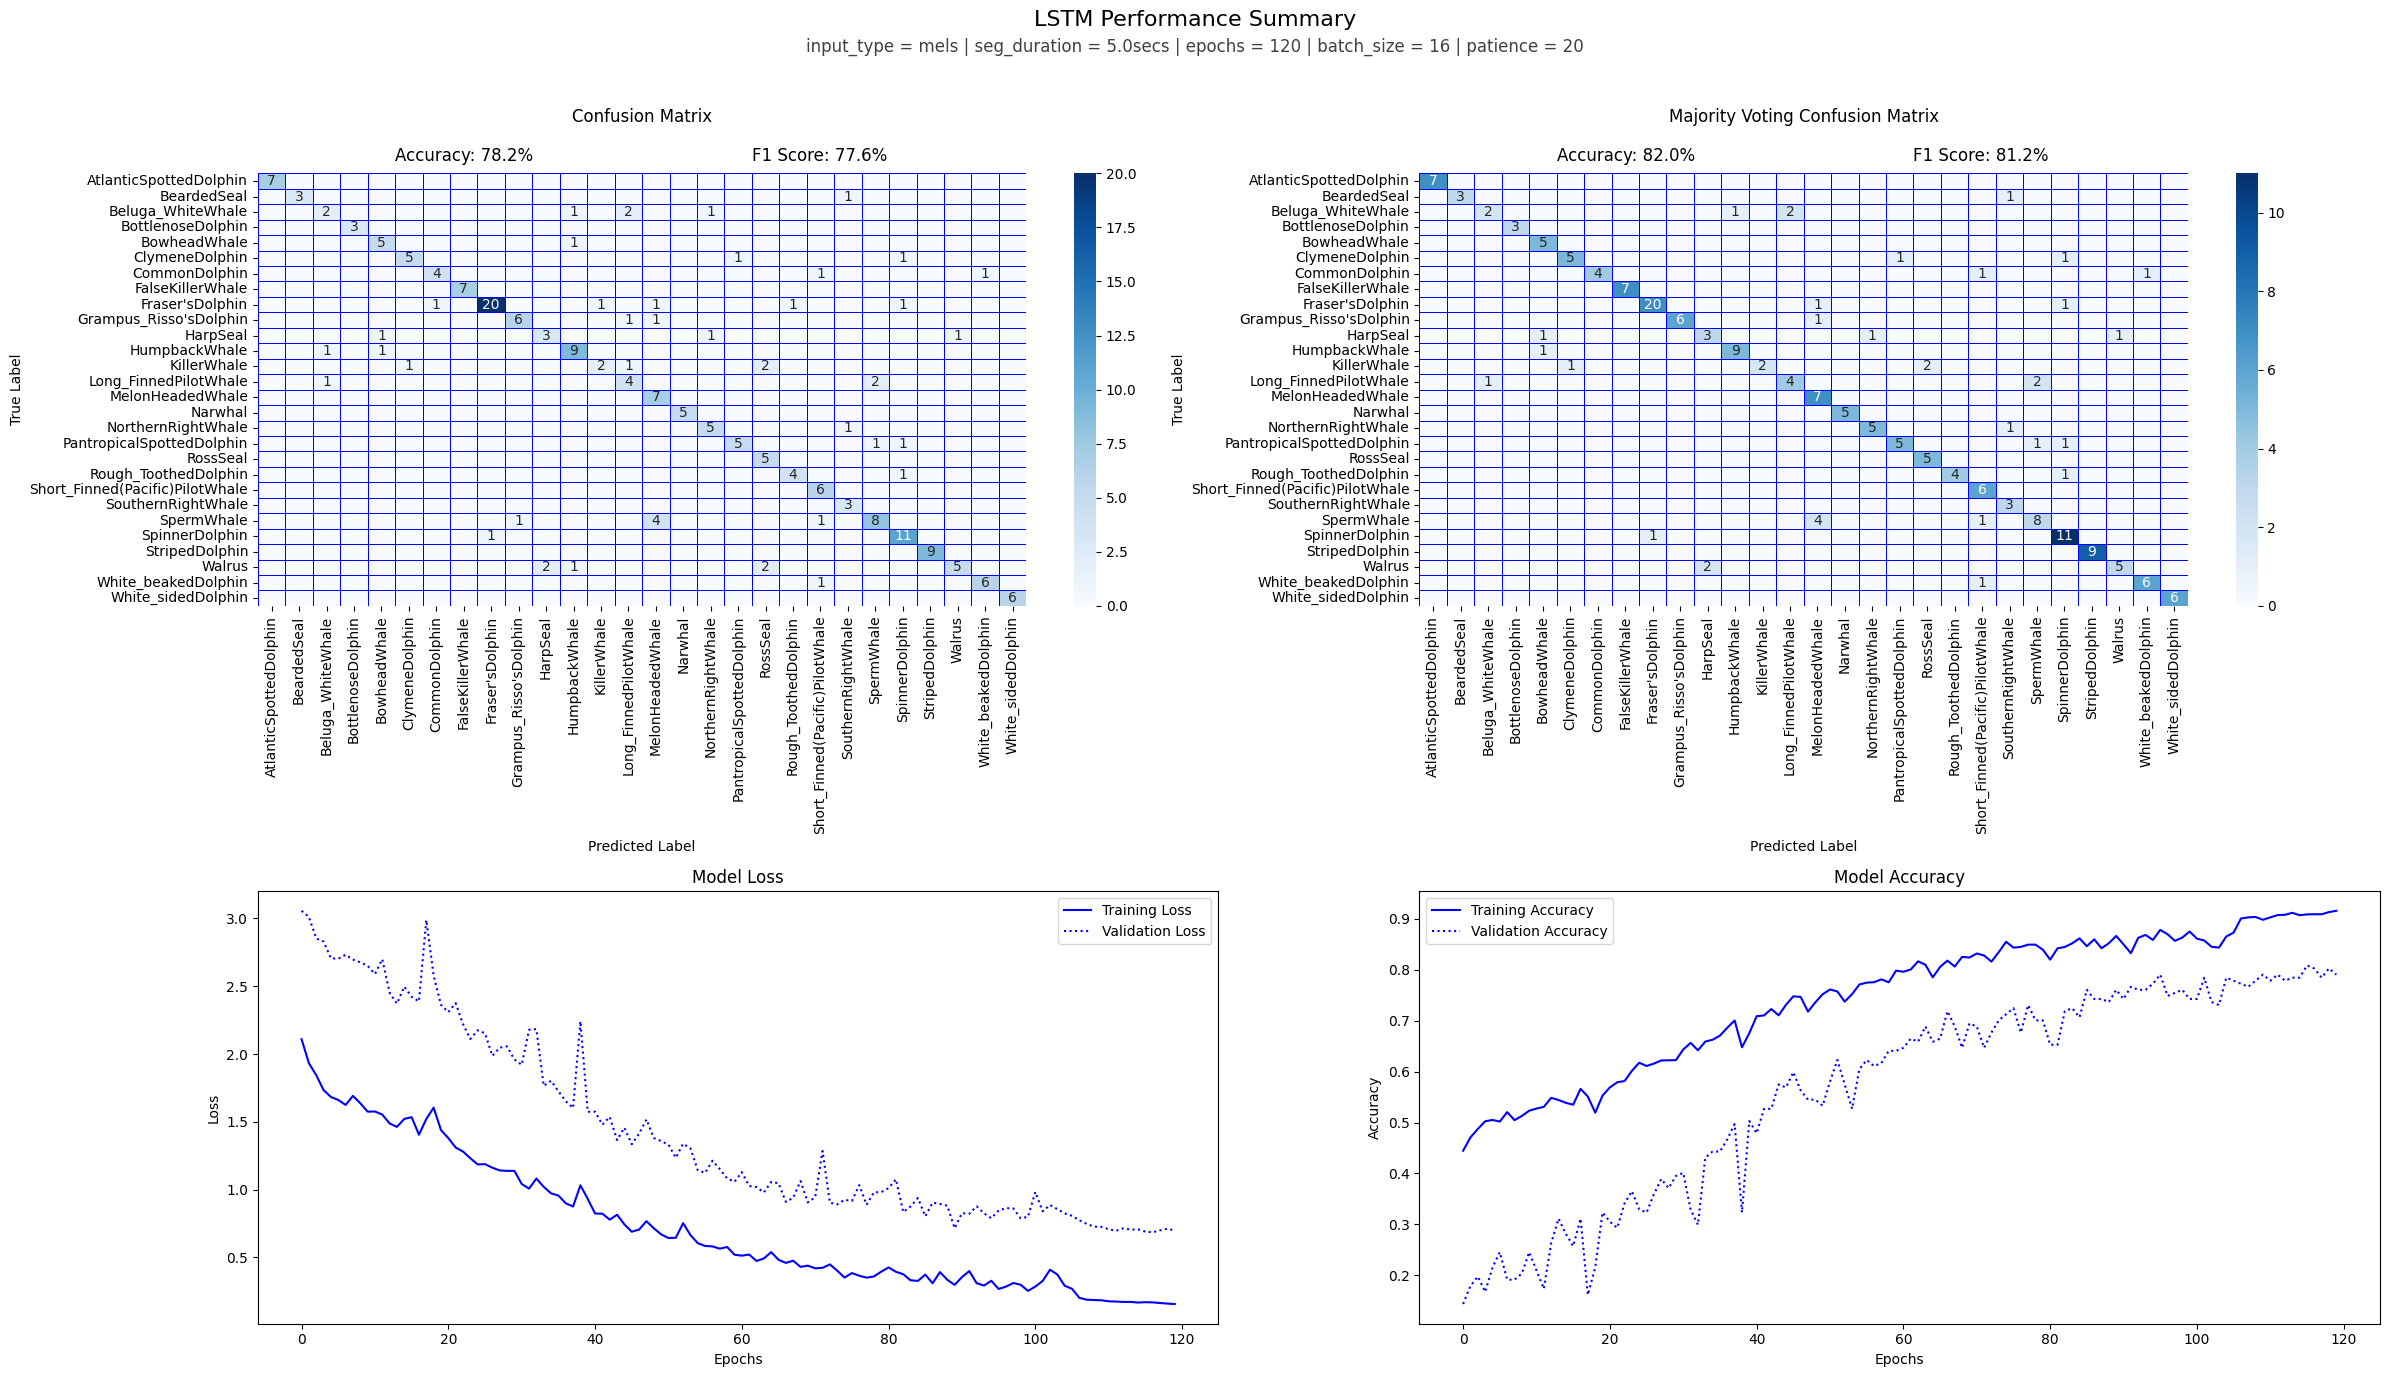

In [ ]:
process_pipeline('mels_5.0_80_16_20', 'mels', '5.0', 120, 16, 20)